In [7]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image
import requests
import gc

class VideoFeatureExtractor:
    def __init__(self, csv_path):
        self.df = pd.read_csv(csv_path)
        self.model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')  # Use MobileNetV2

    def is_url_accessible(self, url):
        """Checks if a given URL is accessible."""
        try:
            print(f"Checking URL: {url}")
            response = requests.head(url, allow_redirects=True, timeout=5)
            return response.status_code == 200
        except Exception as e:
            print(f"Error checking URL: {url}, {e}")
            return False

    def extract_video_features(self, video_path, frame_interval=150):
        """Extract features from video using MobileNetV2."""
        cap = cv2.VideoCapture(video_path)
        frames = []
        count = 0

        while len(frames) < 10:
            ret, frame = cap.read()
            if not ret:
                break

            if count % frame_interval == 0:
                resized_frame = cv2.resize(frame, (128, 128))
                preprocessed = image.img_to_array(resized_frame)
                preprocessed = np.expand_dims(preprocessed, axis=0)
                preprocessed = preprocess_input(preprocessed)
                features = self.model.predict(preprocessed)
                frames.append(features.flatten())
            count += 1

        cap.release()

        if len(frames) == 0:
            raise ValueError("No valid frames extracted from video.")
        
        return np.mean(frames, axis=0)

    def cluster_videos(self, n_clusters=5):
        """Cluster videos based on extracted features."""
        features = []
        valid_urls = []

        for url in self.df['Video URL']:
            if not self.is_url_accessible(url):
                print(f"Skipping inaccessible URL: {url}")
                continue
            
            try:
                print(f"Processing video: {url}")
                feature = self.extract_video_features(url)
                features.append(feature)
                valid_urls.append(url)
            except Exception as e:
                print(f"Could not process {url}: {e}")
            
            # Free up memory
            gc.collect()

        if not features:
            print("No valid video features were extracted.")
            return pd.DataFrame()

        # Scale features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)
        
        # Perform clustering
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = clusterer.fit_predict(scaled_features)
        
        # Merge clustering results with original dataframe
        cluster_df = pd.DataFrame({'Video URL': valid_urls, 'cluster': clusters})
        performance_analysis = cluster_df.merge(self.df, on='Video URL')

        return performance_analysis.groupby('cluster').agg({'Performance': ['mean', 'count']}).reset_index()

# Usage Example
if __name__ == "__main__":
    csv_file = 'assignmentData.csv'  # Path to your CSV file
    extractor = VideoFeatureExtractor(csv_file)
    cluster_results = extractor.cluster_videos(n_clusters=4)

    if not cluster_results.empty:
        print(cluster_results)
    else:
        print("No clustering results available.")


/var/folders/87/kt5d8w_91sv35d3nb1dwnf1m0000gn/T/ipykernel_79717/1232168164.py:14: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  self.model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')  # Use MobileNetV2


Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-999607261342550
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-999607261342550
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-997580728807604
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-997580728807604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-992418235673669
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-992418235673669
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Check

[tcp @ 0x600003647450] Connection to tcp://fgimagestorage.blob.core.windows.net:443 failed: Operation timed out
OpenCV: Couldn't read video stream from file "https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-986360206629277"
[ERROR:0@10504.710] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap.cpp (166) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:267: error: (-215:Assertion failed) number < max_number in function 'icvExtractPattern'




Could not process https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-986360206629277: No valid frames extracted from video.
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-983335896508749
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-983335896508749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-978448136455993
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-978448136455993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-977008307250628
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-977008307250628
1/1 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-932085787962122
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-932085787962122
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-932038864470963
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-932038864470963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-930116227971248
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-930116227971248
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Checki

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-899155277883965
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-899155277883965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-898967424867870
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-898967424867870
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-898402801287469
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-898402801287469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Checki

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-882993126248062
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-882993126248062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8828692983838031
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8828692983838031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-882867522830120
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-882867522830120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 

[tcp @ 0x600003645e60] Connection to tcp://fgimagestorage.blob.core.windows.net:443 failed: Operation timed out
OpenCV: Couldn't read video stream from file "https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-882019143545185"
[ERROR:0@10823.877] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap.cpp (166) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:267: error: (-215:Assertion failed) number < max_number in function 'icvExtractPattern'




Could not process https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-882019143545185: No valid frames extracted from video.
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-881925359723909
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-881925359723909
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8816515918390519
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8816515918390519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-881342303358042
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-881342303358042
1/1 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-818776323774715
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-818776323774715
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-818462803696191
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-818462803696191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-817768845898837
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-817768845898837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━

[tcp @ 0x60000365c090] Connection to tcp://fgimagestorage.blob.core.windows.net:443 failed: Operation timed out
OpenCV: Couldn't read video stream from file "https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-813828049840959"
[ERROR:0@10937.347] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap.cpp (166) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:267: error: (-215:Assertion failed) number < max_number in function 'icvExtractPattern'




Could not process https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-813828049840959: No valid frames extracted from video.
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-811606650922029
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-811606650922029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8111507755613955
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8111507755613955
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8100667816697710
Processing video: https://fgimagestorage

[tcp @ 0x6000036cba80] Connection to tcp://fgimagestorage.blob.core.windows.net:443 failed: Operation timed out
OpenCV: Couldn't read video stream from file "https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-806751788307038"
[ERROR:0@10958.544] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap.cpp (166) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:267: error: (-215:Assertion failed) number < max_number in function 'icvExtractPattern'




Could not process https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-806751788307038: No valid frames extracted from video.
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8057957437624799
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8057957437624799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-803990118540094
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-803990118540094
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-803897110603133
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-680540137074841
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-680540137074841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-680162593779089
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-680162593779089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-679261516829908
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-679261516829908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-1693566687752051
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-1693566687752051
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-1689212771862832
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-1689212771862832
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Checking URL: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-1685108828975354
Processing video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-1685108828975354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/Users/vaishnavikrovvidi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  cluster Performance      
                 mean count
0       0    0.972873    55
1       1    1.080697    89
2       2    0.980577   108
3       3    0.936952     8


In [22]:
import os
import cv2
import pandas as pd
import numpy as np
import face_recognition
import requests

class InfluencerPerformanceAnalyzer:
    def __init__(self, csv_path, output_dir='output'):
        """Initialize the analyzer with the dataset and output directory."""
        self.df = pd.read_csv(csv_path)
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)
        self.influencer_images_dir = os.path.join(self.output_dir, 'influencers')
        os.makedirs(self.influencer_images_dir, exist_ok=True)
        self.results = {}

    def download_video(self, url, filename):
        """Download a video from an HTTP URL and save it locally."""
        try:
            response = requests.get(url, stream=True)
            if response.status_code == 200:
                local_path = os.path.join(self.output_dir, filename)
                with open(local_path, 'wb') as f:
                    for chunk in response.iter_content(chunk_size=1024):
                        f.write(chunk)
                return local_path
            else:
                print(f"ERROR: Failed to download video from {url}, status code: {response.status_code}")
                return None
        except Exception as e:
            print(f"ERROR: Failed to download video from {url}: {e}")
            return None

    def extract_faces(self, video_path, max_frames=5):
        """Extract unique face encodings from a video."""
        faces = []
        try:
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"ERROR: Could not open video file: {video_path}")
                return faces

            frame_count = 0
            while frame_count < max_frames:
                ret, frame = cap.read()
                if not ret:
                    break

                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                face_locations = face_recognition.face_locations(rgb_frame)
                face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

                for i, face_encoding in enumerate(face_encodings):
                    # Save representative face image
                    face_location = face_locations[i]
                    top, right, bottom, left = face_location
                    face_image = frame[top:bottom, left:right]
                    faces.append((face_encoding, face_image))

                frame_count += 1

            cap.release()
        except Exception as e:
            print(f"ERROR processing video {video_path}: {e}")
        return faces

    def analyze_performance(self):
        """Analyze influencer performance."""
        for index, row in self.df.iterrows():
            try:
                video_url = row['Video URL']
                performance = row['Performance']
                filename = f"video_{index + 1}.mp4"

                print(f"Processing video {index + 1}/{len(self.df)}: {video_url}")
                local_path = self.download_video(video_url, filename)
                if not local_path:
                    continue

                video_faces = self.extract_faces(local_path)
                if not video_faces:
                    print(f"No faces detected in video: {video_url}")
                    continue

                for face_encoding, face_image in video_faces:
                    matched = False
                    for influencer_name, data in self.results.items():
                        known_encodings = data['encodings']
                        matches = face_recognition.compare_faces(known_encodings, face_encoding)
                        if any(matches):
                            # Match found
                            matched = True
                            self.results[influencer_name]['performances'].append(performance)
                            self.results[influencer_name]['videos'].append(video_url)
                            break

                    if not matched:
                        # Create a new influencer entry
                        influencer_name = f"Influencer_{len(self.results) + 1}"
                        self.results[influencer_name] = {
                            'encodings': [face_encoding],
                            'performances': [performance],
                            'videos': [video_url],
                            'representative_image': None,
                        }
                        # Save representative image
                        image_path = os.path.join(self.influencer_images_dir, f"{influencer_name}.jpg")
                        cv2.imwrite(image_path, face_image)
                        self.results[influencer_name]['representative_image'] = image_path

            except Exception as e:
                print(f"Error processing video {index + 1}: {e}")

    def generate_report(self):
        """Generate a report summarizing influencer performance."""
        performance_summary = {}
        for influencer_name, data in self.results.items():
            performance_summary[influencer_name] = {
                'avg_performance': np.mean(data['performances']),
                'video_count': len(data['videos']),
                'videos': data['videos'],
                'representative_image': data['representative_image']
            }

        report_df = pd.DataFrame.from_dict(performance_summary, orient='index')
        report_path = os.path.join(self.output_dir, 'influencer_report.csv')
        report_df.to_csv(report_path)
        print(f"Report saved to {report_path}")
        return report_df

# Usage
try:
    csv_path = 'assignmentData.csv'  # Path to your dataset
    analyzer = InfluencerPerformanceAnalyzer(csv_path)
    analyzer.analyze_performance()
    influencer_report = analyzer.generate_report()

    print("\n--- FINAL INFLUENCER PERFORMANCE REPORT ---")
    print(influencer_report)

except Exception as e:
    print(f"FATAL ERROR: {e}")


Processing video 1/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-999607261342550
Processing video 2/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-997580728807604
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-997580728807604
Processing video 3/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-992418235673669
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-992418235673669
Processing video 4/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-992064161877405
Processing video 5/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-991636695150147
Processing video 6/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-989969399547901
Processing video 7/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-989930303148492
No faces detected in video: https://fgimagestorage.blob.

No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-924865635226814
Processing video 62/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-924585008982148
Processing video 63/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-911926190614858
Processing video 64/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-911482386703699
Processing video 65/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-911172609864769
Processing video 66/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-910958533691058
Processing video 67/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-909937876815529
Processing video 68/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-909110383822260
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-909110383822260
Processing video 69/268: https://fgimagestorage.b

Processing video 123/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-885670366433640
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-885670366433640
Processing video 124/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-885209946993560
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-885209946993560
Processing video 125/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-883738210384679
Processing video 126/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-883246492824014
Processing video 127/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-882993126248062
Processing video 128/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8828692983838031
Processing video 129/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-882867522830120
Processing video 130/268: https://fgimage

Processing video 177/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-814072014151046
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-814072014151046
Processing video 178/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-813828049840959
Processing video 179/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-811606650922029
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-811606650922029
Processing video 180/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8111507755613955
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8111507755613955
Processing video 181/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8100667816697710
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-8100667816697710
Processing video 182/268: https://

Processing video 238/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-618555366744628
Processing video 239/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-6174004652651971
Processing video 240/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-617288786873081
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-617288786873081
Processing video 241/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-6172742522782221
Processing video 242/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-613417017284998
Processing video 243/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-613197413789434
No faces detected in video: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-613197413789434
Processing video 244/268: https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-613152173490344
Processing video 245/268: https://fgimag

In [28]:
influencer_report.head()

,Influencer,Avg Performance,Video Count
15,Influencer_16,1.530400,5
5,Influencer_6,1.101178,15
12,Influencer_13,1.087190,27
0,Influencer_1,1.074385,450
1,Influencer_2,0.967061,265


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_regression_model(report_df):
    """Train a regression model to predict engagement."""
    # Prepare the dataset
    X = report_df['Video Count'].values.reshape(-1, 1)  # Independent variable: video count
    y = report_df['Avg Performance'].values  # Dependent variable: average performance

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model Mean Squared Error: {mse:.2f}")

    return model

# Train regression model
regression_model = train_regression_model(influencer_report)


Model Mean Squared Error: 0.35


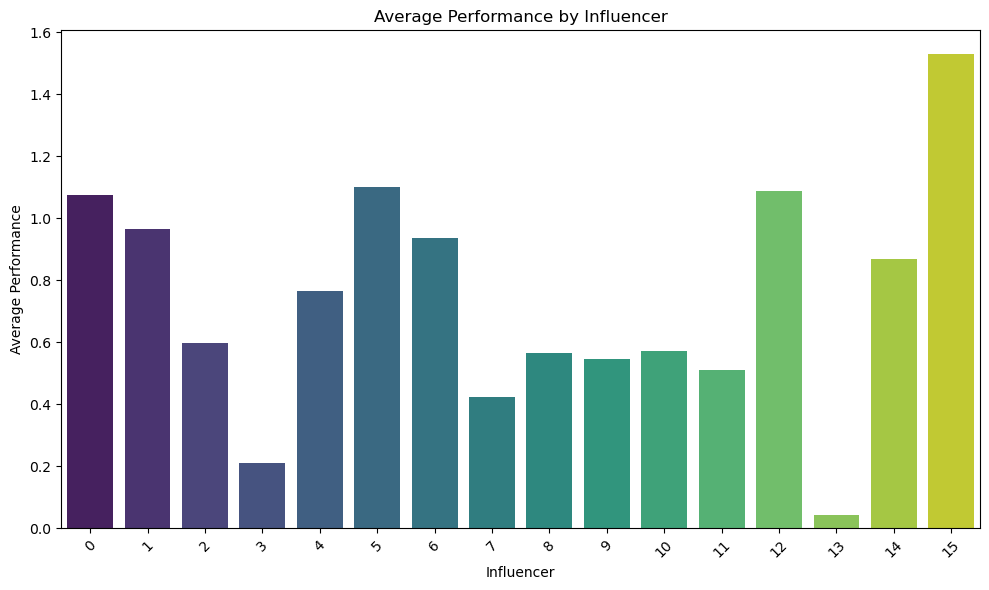

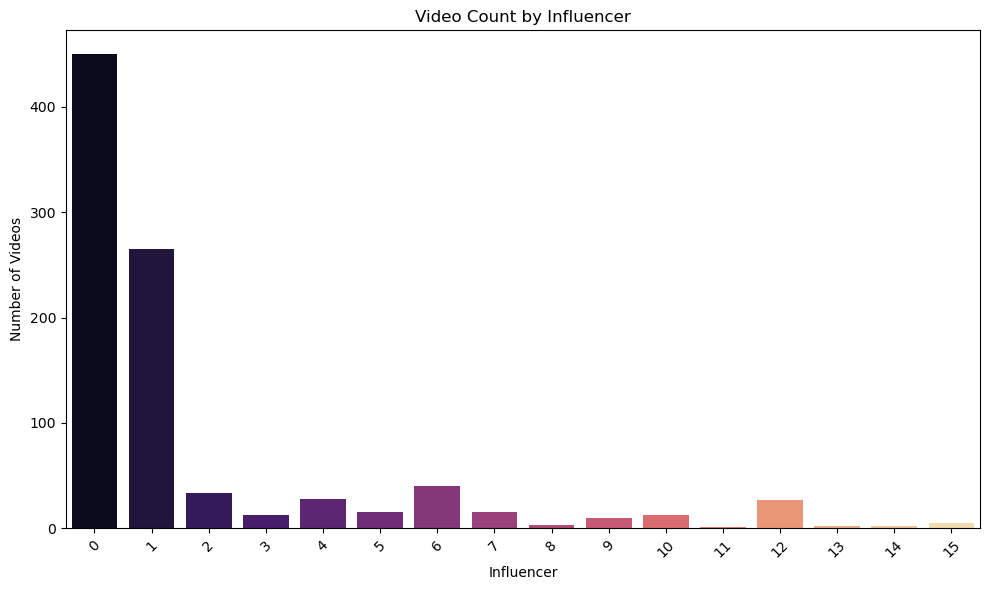

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_performance(report_df):
    """Generate bar charts for influencer performance."""
    # Check if required columns are in the DataFrame
    required_columns = ['Avg Performance', 'Video Count']
    for col in required_columns:
        if col not in report_df.columns:
            raise KeyError(f"Column '{col}' is missing in the DataFrame.")

    # Bar chart: Average performance per influencer
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=report_df.index,
        y=report_df['Avg Performance'].values,
        palette='viridis'
    )
    plt.title("Average Performance by Influencer")
    plt.xlabel("Influencer")
    plt.ylabel("Average Performance")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('average_performance.png')
    plt.show()

    # Bar chart: Video count per influencer
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=report_df.index,
        y=report_df['Video Count'].values,
        palette='magma'
    )
    plt.title("Video Count by Influencer")
    plt.xlabel("Influencer")
    plt.ylabel("Number of Videos")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('video_count.png')
    plt.show()

# Example usage:
# Ensure influencer_report DataFrame has the correct data
visualize_performance(influencer_report)
